## Test greedy EM vs SVD for final thetas

In [7]:
import sys
sys.path.insert(0, 'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank')

In [8]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import oracle,random_player,greedy,bc_mpts

from bandits_to_rank.sampling.pbm_inference import EM, SVD

import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

In [9]:
def time_sec_to_HMS(sec):
    heure=sec//3600
    rest_h=sec%3600
    minute=rest_h//60
    rest_m=rest_h%60

    return(str(int(heure))+'H '+str(int(minute))+'min '+str(int(rest_m))+'sec')

## Tests Egreedy

In [10]:
kappas_desord = [1,0.7,0.3,0.75,0.1]
thetas_final =  [0.3,0.2,0.15,0.15,0.15,0.10,0.05,0.05,0.01,0.01]
nb_prop = len(thetas_final)  
nb_place = len(kappas_desord)

In [11]:
pas = 10
c = 100
env = Environment_PBM(thetas_final,kappas_desord)

 

player_d_Oracle = oracle.Oracle(env.get_best_index())
player_d_Random = random_player.Random(nb_prop,nb_place)



In [12]:
env.thetas

[0.3, 0.2, 0.15, 0.15, 0.15, 0.1, 0.05, 0.05, 0.01, 0.01]

### Game 20 Trial 5000

In [13]:
nb_trial = 5000
nb_game = 20

referee_Oracle_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_Random_5000trials_20games_thetas_final = Referee(env,nb_trial)


referee_EGreedy_SVD_c100_n_MAJ_1_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_EGreedy_SVD_c50_n_MAJ_1_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_1_5000trials_20games_thetas_final = Referee(env,nb_trial)

referee_EGreedy_SVD_c100_n_MAJ_5_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_EGreedy_SVD_c50_n_MAJ_5_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_5_5000trials_20games_thetas_final = Referee(env,nb_trial)

referee_EGreedy_SVD_c100_n_MAJ_10_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_EGreedy_SVD_c50_n_MAJ_10_5000trials_20games_thetas_final = Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_10_5000trials_20games_thetas_final = Referee(env,nb_trial)

referee_EGreedy_SVD_c100_n_MAJ_100_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_EGreedy_SVD_c50_n_MAJ_100_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_100_5000trials_20games_thetas_final =  Referee(env,nb_trial)


referee_EGreedy_SVD_c100_n_MAJ_1000_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_EGreedy_SVD_c50_n_MAJ_1000_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_1000_5000trials_20games_thetas_final =  Referee(env,nb_trial)

referee_EGreedy_EM_c100_n_MAJ_10_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_EGreedy_EM_c50_n_MAJ_10_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_10_5000trials_20games_thetas_final =  Referee(env,nb_trial)

referee_EGreedy_EM_c100_n_MAJ_100_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_EGreedy_EM_c50_n_MAJ_100_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final =  Referee(env,nb_trial)

referee_EGreedy_EM_c100_n_MAJ_1000_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_EGreedy_EM_c50_n_MAJ_1000_5000trials_20games_thetas_final =  Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final =  Referee(env,nb_trial)




In [14]:
####trop long
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    referee_Oracle_5000trials_20games_thetas_final.play_game(player_d_Oracle)
    referee_Random_5000trials_20games_thetas_final.play_game(player_d_Random)
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 4sec


In [15]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_SVD_c100_n_MAJ_1 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,1)
    player_EGreedy_SVD_c50_n_MAJ_1 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,1)
    player_greedy_SVD_n_MAJ_1 =  greedy.greedy(nb_prop,nb_place,1)

    
    referee_EGreedy_SVD_c100_n_MAJ_1_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c100_n_MAJ_1)
    referee_EGreedy_SVD_c50_n_MAJ_1_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c50_n_MAJ_1)
    referee_greedy_SVD_n_MAJ_1_5000trials_20games_thetas_final.play_game(player_greedy_SVD_n_MAJ_1)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 1min 18sec


In [16]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()

    player_EGreedy_SVD_c100_n_MAJ_5 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,5)
    player_EGreedy_SVD_c50_n_MAJ_5 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,5)
    player_greedy_SVD_n_MAJ_5 =  greedy.greedy(nb_prop,nb_place,5)

    referee_EGreedy_SVD_c100_n_MAJ_5_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c100_n_MAJ_5)
    referee_EGreedy_SVD_c50_n_MAJ_5_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c50_n_MAJ_5)
    referee_greedy_SVD_n_MAJ_5_5000trials_20games_thetas_final.play_game(player_greedy_SVD_n_MAJ_5)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 35sec


In [17]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_SVD_c100_n_MAJ_10 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,10)
    player_EGreedy_SVD_c50_n_MAJ_10 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,10)
    player_greedy_SVD_n_MAJ_10 =  greedy.greedy(nb_prop,nb_place,10)    
    
    referee_EGreedy_SVD_c100_n_MAJ_10_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c100_n_MAJ_10)
    referee_EGreedy_SVD_c50_n_MAJ_10_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c50_n_MAJ_10)
    referee_greedy_SVD_n_MAJ_10_5000trials_20games_thetas_final.play_game(player_greedy_SVD_n_MAJ_10)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 28sec


In [18]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_SVD_c100_n_MAJ_100 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,100)
    player_EGreedy_SVD_c50_n_MAJ_100 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,100)
    player_greedy_SVD_n_MAJ_100 =  greedy.greedy(nb_prop,nb_place,100)    
    
    referee_EGreedy_SVD_c100_n_MAJ_100_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c100_n_MAJ_100)
    referee_EGreedy_SVD_c50_n_MAJ_100_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c50_n_MAJ_100)
    referee_greedy_SVD_n_MAJ_100_5000trials_20games_thetas_final.play_game(player_greedy_SVD_n_MAJ_100)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 23sec


In [19]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_SVD_c100_n_MAJ_1000 =  greedy.greedy_EGreedy(100,nb_prop,nb_place,100)
    player_EGreedy_SVD_c50_n_MAJ_1000 =  greedy.greedy_EGreedy(50,nb_prop,nb_place,100)
    player_greedy_SVD_n_MAJ_1000 =  greedy.greedy(nb_prop,nb_place,1000)
    
    referee_EGreedy_SVD_c100_n_MAJ_1000_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c100_n_MAJ_1000)
    referee_EGreedy_SVD_c50_n_MAJ_1000_5000trials_20games_thetas_final.play_game(player_EGreedy_SVD_c50_n_MAJ_1000)
    referee_greedy_SVD_n_MAJ_1000_5000trials_20games_thetas_final.play_game(player_greedy_SVD_n_MAJ_1000)
   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 23sec


In [24]:
start = time.time()
  
for i in range(nb_game):
    print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_EM_c100_n_MAJ_1000 =  greedy.greedy_EGreedy_EM(100,nb_prop,nb_place,1000)
    player_EGreedy_EM_c50_n_MAJ_1000 =  greedy.greedy_EGreedy_EM(50,nb_prop,nb_place,1000)
    player_greedy_EM_n_MAJ_1000 =  greedy.greedy_EM(nb_prop,nb_place,1000)
    
    start_Egreedy_1 = time.time()
    referee_EGreedy_EM_c100_n_MAJ_1000_5000trials_20games_thetas_final.play_game(player_EGreedy_EM_c100_n_MAJ_1000)
    end_Egreedy_1 = time.time()   
    print ('time_Egreedy_1 :',time_sec_to_HMS(end_Egreedy_1-start_Egreedy_1))
    
    start_Egreedy_2 = time.time()
    referee_EGreedy_EM_c50_n_MAJ_1000_5000trials_20games_thetas_final.play_game(player_EGreedy_EM_c50_n_MAJ_1000)
    end_Egreedy_2 = time.time()   
    print ('time_Egreedy_2 :',time_sec_to_HMS(end_Egreedy_2-start_Egreedy_2))
    
    start_greedy= time.time()
    referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final.play_game(player_greedy_EM_n_MAJ_1000)
    end_greedy = time.time()   
    print ('time__greedy :',time_sec_to_HMS(end_greedy-start_greedy))
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

#### game 0
time_Egreedy_1 : 0H 1min 10sec
time_Egreedy_2 : 0H 1min 26sec
time__greedy : 0H 2min 39sec
time_game : 0H 5min 16sec
#### game 1
time_Egreedy_1 : 0H 1min 31sec
time_Egreedy_2 : 0H 1min 57sec
time__greedy : 0H 2min 17sec
time_game : 0H 5min 45sec
#### game 2
time_Egreedy_1 : 0H 1min 51sec
time_Egreedy_2 : 0H 2min 5sec
time__greedy : 1H 3min 8sec
time_game : 1H 7min 6sec
#### game 3
time_Egreedy_1 : 0H 1min 19sec
time_Egreedy_2 : 0H 1min 22sec
time__greedy : 0H 2min 6sec
time_game : 0H 4min 48sec
#### game 4
time_Egreedy_1 : 0H 1min 21sec
time_Egreedy_2 : 0H 1min 33sec
time__greedy : 0H 2min 5sec
time_game : 0H 5min 0sec
#### game 5
time_Egreedy_1 : 0H 1min 18sec
time_Egreedy_2 : 0H 1min 33sec
time__greedy : 0H 2min 6sec
time_game : 0H 4min 58sec
#### game 6
time_Egreedy_1 : 0H 1min 20sec
time_Egreedy_2 : 0H 1min 32sec
time__greedy : 0H 2min 5sec
time_game : 0H 4min 58sec
#### game 7
time_Egreedy_1 : 0H 1min 20sec
time_Egreedy_2 : 0H 1min 32sec
time__greedy : 0H 2min 6sec
tim

In [36]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_EM_c100_n_MAJ_100 =  greedy.greedy_EGreedy_EM(100,nb_prop,nb_place,100)
    player_EGreedy_EM_c50_n_MAJ_100 =  greedy.greedy_EGreedy_EM(50,nb_prop,nb_place,100)
    player_greedy_EM_n_MAJ_100 =  greedy.greedy_EM(nb_prop,nb_place,100)
    
    start_Egreedy_1 = time.time()
    referee_EGreedy_EM_c100_n_MAJ_100_5000trials_20games_thetas_final.play_game(player_EGreedy_EM_c100_n_MAJ_100)
    end_Egreedy_1 = time.time()   
    print ('time_Egreedy_1 :',time_sec_to_HMS(end_Egreedy_1-start_Egreedy_1))
    
    start_Egreedy_2 = time.time()
    referee_EGreedy_EM_c50_n_MAJ_100_5000trials_20games_thetas_final.play_game(player_EGreedy_EM_c50_n_MAJ_100)
    end_Egreedy_2 = time.time()   
    print ('time_Egreedy_2 :',time_sec_to_HMS(end_Egreedy_2-start_Egreedy_2))
    
    start_greedy= time.time()
    referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final.play_game(player_greedy_EM_n_MAJ_100)
    end_greedy = time.time()   
    print ('time__greedy :',time_sec_to_HMS(end_greedy-start_greedy))
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time_Egreedy_1 : 0H 12min 56sec
time_Egreedy_2 : 0H 13min 52sec
time__greedy : 0H 14min 19sec
time_game : 0H 41min 8sec
time_Egreedy_1 : 0H 13min 1sec
time_Egreedy_2 : 0H 13min 56sec
time__greedy : 1H 54min 6sec
time_game : 2H 21min 5sec
time_Egreedy_1 : 0H 11min 49sec
time_Egreedy_2 : 0H 12min 44sec
time__greedy : 0H 13min 42sec
time_game : 0H 38min 17sec
time_Egreedy_1 : 0H 13min 38sec
time_Egreedy_2 : 0H 13min 33sec
time__greedy : 0H 14min 29sec
time_game : 0H 41min 41sec
time_Egreedy_1 : 0H 12min 22sec
time_Egreedy_2 : 0H 12min 51sec
time__greedy : 0H 13min 9sec
time_game : 0H 38min 23sec
time_Egreedy_1 : 0H 12min 18sec
time_Egreedy_2 : 0H 12min 45sec
time__greedy : 0H 13min 41sec
time_game : 0H 38min 45sec
time_Egreedy_1 : 0H 12min 0sec
time_Egreedy_2 : 0H 12min 28sec
time__greedy : 0H 13min 22sec
time_game : 0H 37min 51sec
time_Egreedy_1 : 0H 12min 5sec
time_Egreedy_2 : 0H 12min 32sec
time__greedy : 0H 13min 14sec
time_game : 0H 37min 52sec
time_Egreedy_1 : 0H 12min 15sec
time_Eg

In [59]:
start = time.time()
  
for i in range(1):
    #print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_EM_c100_n_MAJ_10 =  greedy.greedy_EGreedy_EM(100,nb_prop,nb_place,10)
    #player_EGreedy_EM_c50_n_MAJ_10 =  greedy.greedy_EGreedy_EM(50,nb_prop,nb_place,10)
    #player_greedy_EM_n_MAJ_10 =  greedy.greedy_EM(nb_prop,nb_place,10)
    
    
    referee_EGreedy_EM_c100_n_MAJ_10_5000trials_20games_thetas_final.play_game(player_EGreedy_EM_c100_n_MAJ_10)
   
    #referee_EGreedy_EM_c50_n_MAJ_10_5000trials_20games_thetas_final.play_game(player_EGreedy_EM_c50_n_MAJ_10)
    
    #referee_greedy_EM_n_MAJ_10_5000trials_20games_thetas_final.play_game(player_greedy_EM_n_MAJ_10)
      
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time_game : 1H 40min 15sec
time : 1H 40min 15sec


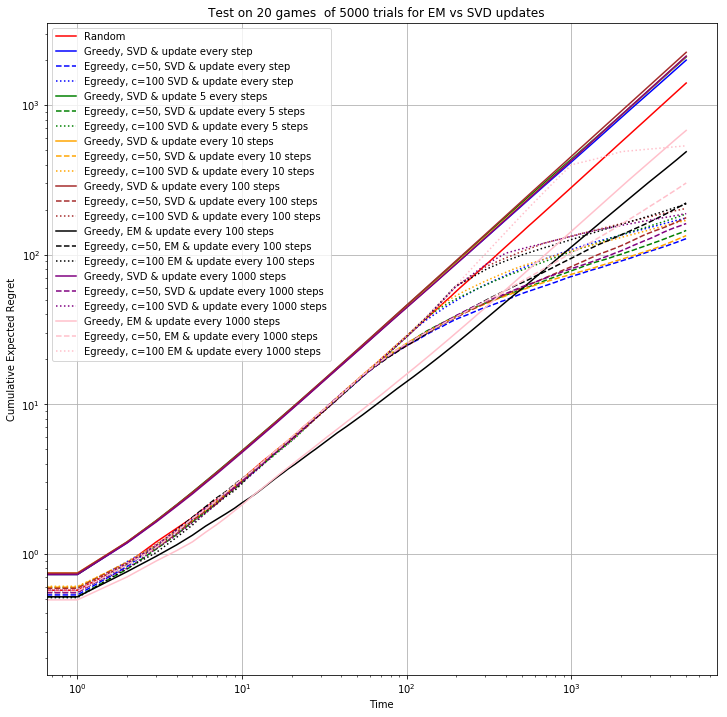

In [57]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(12, 12))

#plt.plot(trials, np.cumsum(referee_Oracle_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='-', label='Greedy, SVD & update every step')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='--', label='Egreedy, c=50, SVD & update every step')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle =':', label='Egreedy, c=100 SVD & update every step')

plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_5_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'g',linestyle ='-', label='Greedy, SVD & update 5 every steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_5_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'g',linestyle ='--', label='Egreedy, c=50, SVD & update every 5 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_5_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'g',linestyle =':', label='Egreedy, c=100 SVD & update every 5 steps')


plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_10_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle ='-', label='Greedy, SVD & update every 10 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_10_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle ='--', label='Egreedy, c=50, SVD & update every 10 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_10_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle =':', label='Egreedy, c=100 SVD & update every 10 steps')


plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='-', label='Greedy, SVD & update every 100 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='--', label='Egreedy, c=50, SVD & update every 100 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle =':', label='Egreedy, c=100 SVD & update every 100 steps')


plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='-', label='Greedy, EM & update every 100 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c50_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='--', label='Egreedy, c=50, EM & update every 100 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c100_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle =':', label='Egreedy, c=100 EM & update every 100 steps')


plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='-', label='Greedy, SVD & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='--', label='Egreedy, c=50, SVD & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle =':', label='Egreedy, c=100 SVD & update every 1000 steps')

plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='-', label='Greedy, EM & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c50_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='--', label='Egreedy, c=50, EM & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c100_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle =':', label='Egreedy, c=100 EM & update every 1000 steps')


plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('               Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials for EM vs SVD updates                  ')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

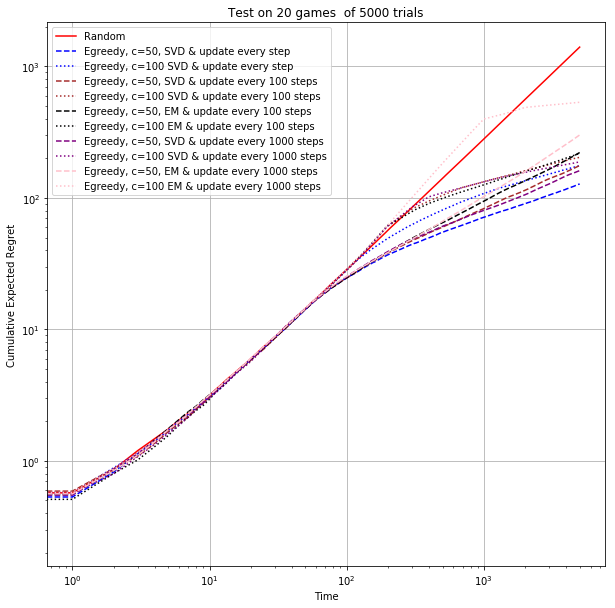

In [52]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(10, 10))

#plt.plot(trials, np.cumsum(referee_Oracle_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'r-', label='Random')

#plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='-', label='Greedy, SVD & update every step')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='--', label='Egreedy, c=50, SVD & update every step')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle =':', label='Egreedy, c=100 SVD & update every step')


#plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='-', label='Greedy, SVD & update every 100 step')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='--', label='Egreedy, c=50, SVD & update every 100 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle =':', label='Egreedy, c=100 SVD & update every 100 steps')


#plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='-', label='Greedy, EM & update every 100 step')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c50_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='--', label='Egreedy, c=50, EM & update every 100 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c100_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle =':', label='Egreedy, c=100 EM & update every 100 steps')


#plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='-', label='Greedy, SVD & update every 1000 step')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c50_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='--', label='Egreedy, c=50, SVD & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_SVD_c100_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle =':', label='Egreedy, c=100 SVD & update every 1000 steps')

#plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='-', label='Greedy, EM & update every 1000 step')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c50_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='--', label='Egreedy, c=50, EM & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_EGreedy_EM_c100_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle =':', label='Egreedy, c=100 EM & update every 1000 steps')


plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

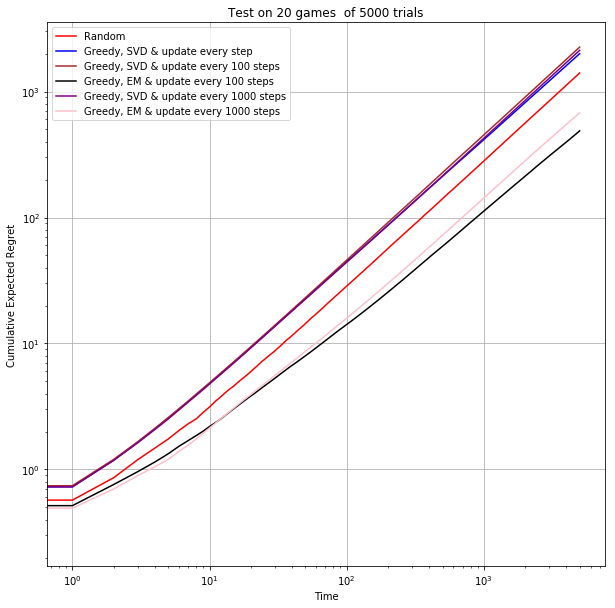

In [53]:
trials = [i for i in range(referee_Oracle_5000trials_20games_thetas_final.nb_trials)]
plt.figure(figsize=(10, 10))

#plt.plot(trials, np.cumsum(referee_Oracle_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials],'r-', label='Random')

plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='-', label='Greedy, SVD & update every step')


plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='-', label='Greedy, SVD & update every 100 steps')


plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='-', label='Greedy, EM & update every 100 steps')


plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='-', label='Greedy, SVD & update every 1000 steps')

plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='-', label='Greedy, EM & update every 1000 steps')


plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### write log 

In [38]:
pwd

'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\\Test\\interaction\\result\\test_thetas\\thetas_final\\EMvsSVD'

In [31]:
cd /..

C:\


In [32]:
cd \Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\Test\interaction\result\test_thetas\thetas_final\EMvsSVD

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\test_thetas\thetas_final\EMvsSVD


In [39]:

with open('referee_Oracle_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_Oracle_5000trials_20games_thetas_final.record_results, file)
with open('referee_Random_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_Random_5000trials_20games_thetas_final.record_results, file)
    
with open('referee_EGreedy_EM_c100_n_MAJ_100_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_EGreedy_EM_c100_n_MAJ_100_5000trials_20games_thetas_final.record_results, file)
with open('referee_EGreedy_EM_c50_n_MAJ_100_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_EGreedy_EM_c50_n_MAJ_100_5000trials_20games_thetas_final.record_results, file)
with open('referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_greedy_EM_n_MAJ_100_5000trials_20games_thetas_final.record_results, file)


with open('referee_EGreedy_EM_c100_n_MAJ_1000_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_EGreedy_EM_c100_n_MAJ_1000_5000trials_20games_thetas_final.record_results, file)
with open('referee_EGreedy_EM_c50_n_MAJ_1000_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_EGreedy_EM_c50_n_MAJ_1000_5000trials_20games_thetas_final.record_results, file)
with open('referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final.txt', 'w') as file:
    json.dump(referee_greedy_EM_n_MAJ_1000_5000trials_20games_thetas_final.record_results, file)
